# Graph format

The EDeN library allows the vectorization of graphs, i.e. the transformation of graphs into sparse vectors.

The graphs that can be processed by the EDeN library have the following restrictions:
- the graphs are implemented as *networkx* graphs
- nodes and edges have identifiers: the following identifiers are used as reserved words
    1. label
    2. weight
    3. entity
    4. nesting
    
- nodes and edges **must** have the 'label' attribute 
- the 'label' attribute can be of one of the following python types: 
    1. string 
    2. list 
    3. dictionary
    
 strings are used to represent categorical values; 
 
 lists are used to represent dense vectors;
 
 dictionaries are used to represent sparse vectors: keys are of string type and values are of type float;
 
 
- nodes and edges **can** have a 'weight' attribute of type float 
- nodes **can** have a 'entity' attribute of type string 
- nesting edges **must** have a 'nesting' attribute of type boolean set to True

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from eden.util import configure_logging
import logging
logger = logging.getLogger()
configure_logging(logger,verbosity=1)

In [2]:
import pylab as plt
import networkx as nx

In [3]:
G=nx.Graph()
G.add_node(0, label='A')
G.add_node(1, label='B')
G.add_node(2, label='C')

G.add_edge(0,1, label='x')
G.add_edge(1,2, label='y')
G.add_edge(2,0, label='z')

In [4]:
from eden.util import display
print display.serialize_graph(G)

{
    "directed":false,
    "graph":{},
    "nodes":[
        {
            "id":0,
            "label":"A"
        },
        {
            "id":1,
            "label":"B"
        },
        {
            "id":2,
            "label":"C"
        }
    ],
    "links":[
        {
            "source":0,
            "target":1,
            "label":"x"
        },
        {
            "source":0,
            "target":2,
            "label":"z"
        },
        {
            "source":1,
            "target":2,
            "label":"y"
        }
    ],
    "multigraph":false
}


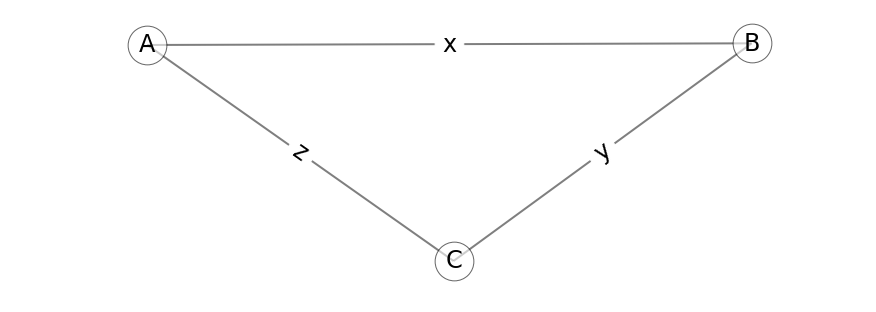

In [5]:
from eden.util import display
display.draw_graph(G,  size=15, vertex_size=1500, font_size=24, vertex_border=True, size_x_to_y_ratio=3)

In [6]:
G=nx.Graph()
G.add_node(0, label=[0,0,.1])
G.add_node(1, label=[0,.1,0])
G.add_node(2, label=[.1,0,0])

G.add_edge(0,1, label='x')
G.add_edge(1,2, label='y')
G.add_edge(2,0, label='z')

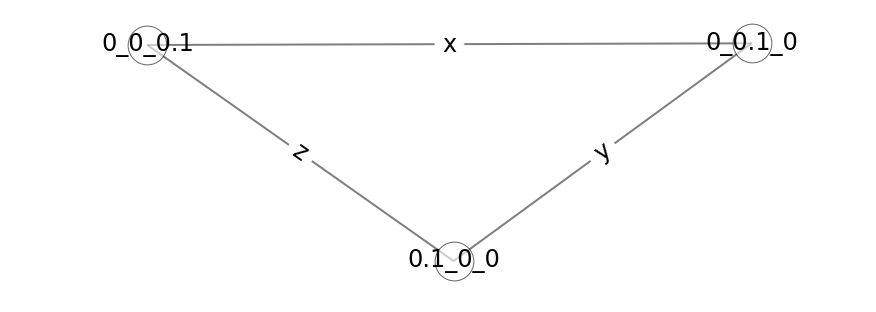

In [7]:
display.draw_graph(G,  size=15, vertex_size=1500, font_size=24, vertex_border=True, size_x_to_y_ratio=3)

In [8]:
G=nx.Graph()
G.add_node(0, label={'A':1, 'B':2, 'C':3})
G.add_node(1, label={'A':1, 'B':2, 'D':3})
G.add_node(2, label={'A':1, 'D':2, 'E':3})

G.add_edge(0,1, label='x')
G.add_edge(1,2, label='y')
G.add_edge(2,0, label='z')

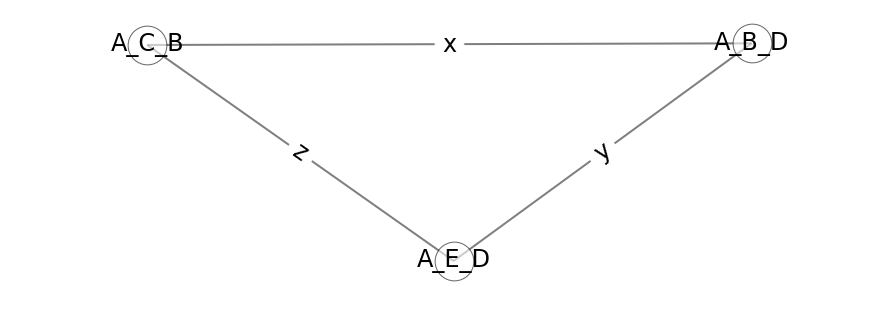

In [9]:
display.draw_graph(G,  size=15, vertex_size=1500, font_size=24, vertex_border=True, size_x_to_y_ratio=3)

In [10]:
G=nx.Graph()
G.add_node(0, label='A')
G.add_node(1, label='B')
G.add_node(2, label='C')
G.add_node(3, label='D')
G.add_node(4, label='E')
G.add_node(5, label='F')

G.add_edge(0,1, label='x')
G.add_edge(0,2, label='y')
G.add_edge(1,3, label='z', nesting=True, weight=.5)
G.add_edge(0,3, label='z', nesting=True, weight=.1)
G.add_edge(2,3, label='z', nesting=True, weight=.01)
G.add_edge(3,4, label='k')
G.add_edge(3,5, label='j')

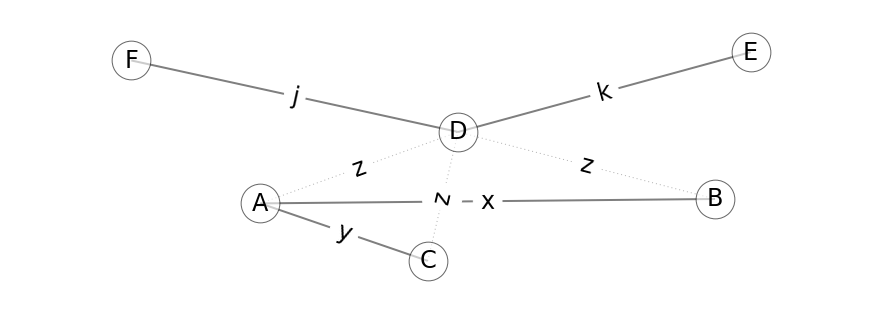

In [11]:
display.draw_graph(G,  size=15, vertex_size=1500, font_size=24, vertex_border=True, size_x_to_y_ratio=3)

In [12]:
from eden.graph import Vectorizer
X=Vectorizer(2).transform_single(G)
from eden.util import describe
print describe(X)
print X

Instances: 1 ; Features: 1048577 with an avg of 104 features per instance
  (0, 10287)	0.144530639012
  (0, 18208)	0.109254682714
  (0, 25148)	0.00722653195062
  (0, 46112)	0.00722653195062
  (0, 48413)	0.109254682714
  (0, 53446)	0.1490711985
  (0, 62094)	0.0361326597531
  (0, 63313)	0.0555555555556
  (0, 90656)	0.109254682714
  (0, 91638)	0.0906929759803
  (0, 103444)	0.144530639012
  (0, 111178)	0.0546273413568
  (0, 126720)	0.00419877224856
  (0, 128997)	0.0906929759803
  (0, 131120)	0.209938612428
  (0, 131826)	0.0218509365427
  (0, 132301)	0.00722653195062
  (0, 147977)	0.0368553129482
  (0, 148564)	0.054421192116
  (0, 158037)	0.0546273413568
  (0, 173876)	0.109254682714
  (0, 194730)	0.000722653195062
  (0, 196004)	0.109254682714
  (0, 203458)	0.109254682714
  (0, 209077)	0.0722653195062
  :	:
  (0, 798555)	0.0218509365427
  (0, 801021)	0.0581735822025
  (0, 806185)	0.0546273413568
  (0, 825078)	0.0551736147703
  (0, 841155)	0.0551736147703
  (0, 844258)	0.109254682714
  (0, 84

In [13]:
G=nx.Graph()
G.add_node(0, label='A')
G.add_node(1, label='B')
G.add_node(2, label='C')
G.add_node(3, label='D')
G.add_node(4, label='E')
G.add_node(5, label='F')

G.add_edge(0,1, label='x')
G.add_edge(0,2, label='y')
G.add_edge(1,3, label='z', nesting=True)
G.add_edge(0,3, label='z', nesting=True)
G.add_edge(2,3, label='z', nesting=True)
G.add_edge(3,4, label='k')
G.add_edge(3,5, label='j')

from eden.graph import Vectorizer
X=Vectorizer(2).transform_single(G)
from eden.util import describe
print describe(X)
print X

Instances: 1 ; Features: 1048577 with an avg of 104 features per instance
  (0, 10287)	0.0710669054519
  (0, 18208)	0.0481125224325
  (0, 25148)	0.0355334527259
  (0, 46112)	0.0355334527259
  (0, 48413)	0.0962250448649
  (0, 53446)	0.117851130198
  (0, 62094)	0.0355334527259
  (0, 63313)	0.0962250448649
  (0, 90656)	0.0481125224325
  (0, 91638)	0.142133810904
  (0, 103444)	0.0710669054519
  (0, 111178)	0.0481125224325
  (0, 126720)	0.0962250448649
  (0, 128997)	0.142133810904
  (0, 131120)	0.0962250448649
  (0, 131826)	0.0962250448649
  (0, 132301)	0.0355334527259
  (0, 147977)	0.0710669054519
  (0, 148564)	0.1490711985
  (0, 158037)	0.0481125224325
  (0, 173876)	0.0481125224325
  (0, 194730)	0.0355334527259
  (0, 196004)	0.0481125224325
  (0, 203458)	0.0481125224325
  (0, 209077)	0.0710669054519
  :	:
  (0, 798555)	0.0962250448649
  (0, 801021)	0.142133810904
  (0, 806185)	0.0481125224325
  (0, 825078)	0.0962250448649
  (0, 841155)	0.0962250448649
  (0, 844258)	0.0481125224325
  (0, 8

Build graphs and then display them

In [14]:
import networkx as nx
graph_list = []

In [15]:
G=nx.Graph()
G.add_node(0, label='A', entity='CATEG')
G.add_node(1, label='B', entity='CATEG')
G.add_node(2, label='C', entity='CATEG')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='A', entity='CATEG')
G.add_node(1, label='B', entity='CATEG')
G.add_node(2, label='X', entity='CATEG')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='A', entity='CATEG')
G.add_node(1, label='B', entity='CATEG')
G.add_node(2, label='X', entity='CATEG')
G.add_edge(0,1, label='x', entity='CATEG_EDGE')
G.add_edge(1,2, label='x', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='X', entity='CATEG')
G.add_node(1, label='X', entity='CATEG')
G.add_node(2, label='X', entity='CATEG')
G.add_edge(0,1, label='x', entity='CATEG_EDGE')
G.add_edge(1,2, label='x', entity='CATEG_EDGE')
graph_list += [G.copy()]

In [16]:
G=nx.Graph()
G.add_node(0, label=[1,0,0], entity='VEC')
G.add_node(1, label=[0,1,0], entity='VEC')
G.add_node(2, label=[0,0,1], entity='VEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label=[1,1,0], entity='VEC')
G.add_node(1, label=[0,1,1], entity='VEC')
G.add_node(2, label=[0,0,1], entity='VEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label=[1,0.1,0.2], entity='VEC')
G.add_node(1, label=[0.3,1,0.4], entity='VEC')
G.add_node(2, label=[0.5,0.6,1], entity='VEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label=[0.1,0.2,0.3], entity='VEC')
G.add_node(1, label=[0.4,0.5,0.6], entity='VEC')
G.add_node(2, label=[0.7,0.8,0.9], entity='VEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

In [17]:
G=nx.Graph()
G.add_node(0, label={'A':1, 'B':1, 'C':1}, entity='SPVEC')
G.add_node(1, label={'a':1, 'B':1, 'C':1}, entity='SPVEC')
G.add_node(2, label={'a':1, 'b':1, 'C':1}, entity='SPVEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label={'A':1,  'C':1, 'D':1}, entity='SPVEC')
G.add_node(1, label={'a':1,  'C':1, 'D':1}, entity='SPVEC')
G.add_node(2, label={'a':1,  'C':1, 'D':1}, entity='SPVEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label={'A':1, 'D':1, 'E':1}, entity='SPVEC')
G.add_node(1, label={'a':1, 'D':1, 'E':1}, entity='SPVEC')
G.add_node(2, label={'a':1, 'D':1, 'E':1}, entity='SPVEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label={'A':1, 'B':1, 'C':1, 'D':1, 'E':1}, entity='SPVEC')
G.add_node(1, label={'a':1, 'B':1, 'C':1, 'D':1, 'E':1}, entity='SPVEC')
G.add_node(2, label={'a':1, 'b':1, 'C':1, 'D':1, 'E':1}, entity='SPVEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

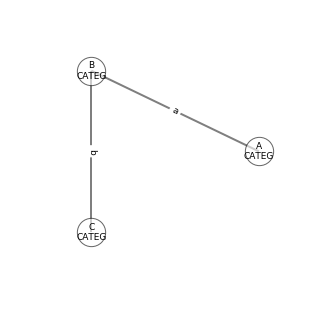

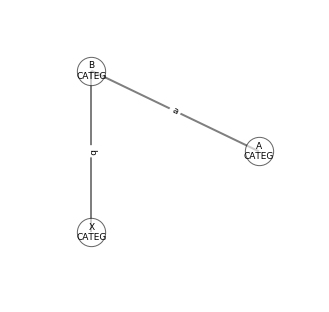

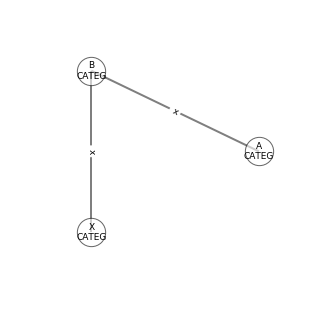

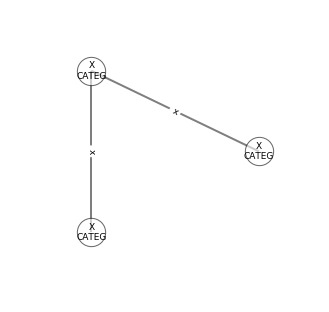

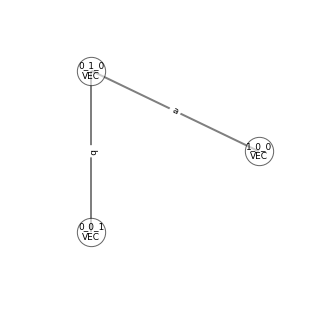

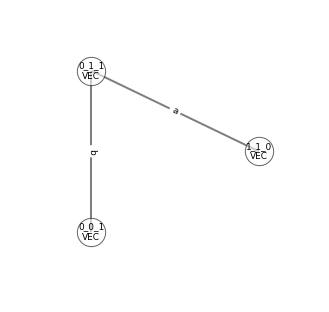

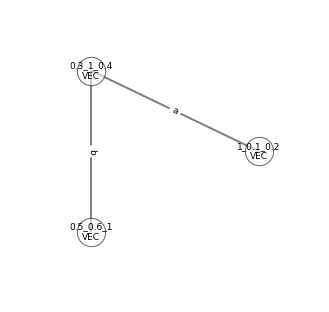

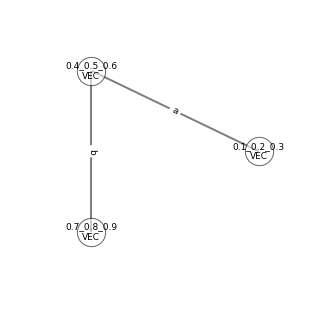

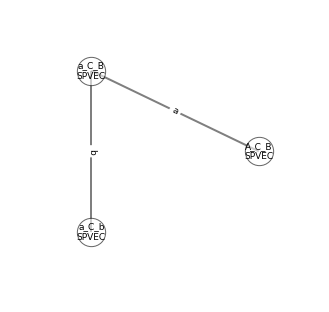

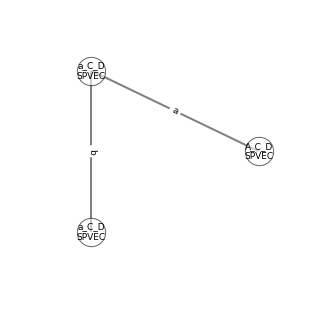

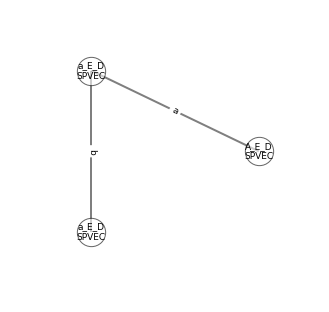

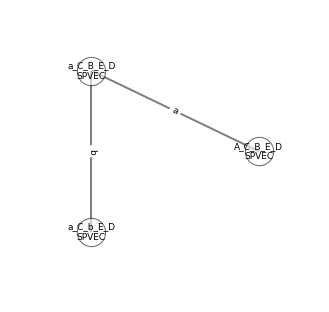

In [18]:
from eden.util import display
for g in graph_list:
    display.draw_graph(g,  size=5, vertex_size=800, vertex_border=1, layout='shell', secondary_vertex_label = 'entity')

Create a vector representation

In [19]:
%%time
from eden.graph import Vectorizer
vectorizer = Vectorizer(complexity=2, n=4, label_size=2)
vectorizer.fit(graph_list)
X = vectorizer.transform(graph_list)
y=[1]*4+[2]*4+[3]*4
print 'Instances: %d \nFeatures: %d with an avg of %d features per instance' % (X.shape[0], X.shape[1],  X.getnnz()/X.shape[0])

Instances: 12 
Features: 1048577 with an avg of 52 features per instance
CPU times: user 923 ms, sys: 322 ms, total: 1.24 s
Wall time: 1.25 s


In [20]:
%%time
from sklearn.decomposition import TruncatedSVD
Xd = TruncatedSVD(n_components=20).fit_transform(X)
from sklearn.manifold import MDS
X2 = MDS().fit_transform(Xd)

CPU times: user 5.6 s, sys: 630 ms, total: 6.23 s
Wall time: 3.28 s


/usr/local/lib/python2.7/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


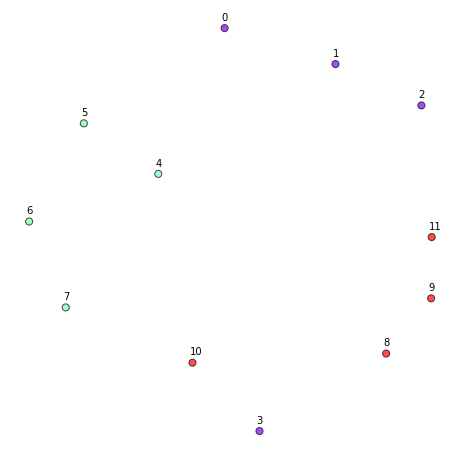

In [21]:
import pylab as plt
def plot(X,y):
    size=8
    cmap = 'rainbow'
    plt.figure(figsize=(size, size))    
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.7, c=y, cmap=cmap, s=50, edgecolors='k')
    for i in range(X.shape[0]):
        plt.annotate(str(i), (X[i, 0], X[i, 1]), xytext=(-3, 8), textcoords='offset points')
    plt.show()
    
plot(X2,y)

Compute pairwise similarity matrix

In [22]:
from ipy_table import * 
def prep_table(K):    
    header = [' ']
    header += [i for i in range(K.shape[0])]
    mat = [header]
    for id, row in enumerate(K):
        new_row = [id]
        new_row += list(row)
        mat.append(new_row)
    return mat

In [23]:
from sklearn import metrics

K=metrics.pairwise.pairwise_kernels(X, metric='linear')

mat=prep_table(K)
make_table(mat)
apply_theme('basic')
set_global_style(float_format = '%0.2f')

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.00,0.26,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.26,1.00,0.37,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.18,0.37,1.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.11,0.11,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,1.00,0.56,0.32,0.30,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.56,1.00,0.24,0.33,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.32,0.24,1.00,0.34,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.30,0.33,0.34,1.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.64,0.12,0.30
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.64,1.00,0.20,0.67


---